In [ ]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 59.8 MB/s eta 0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from pycaret.datasets import get_data
from pycaret.utils import version
from pycaret.time_series import TSForecastingExperiment

In [ ]:
# Load the dataset
data = pd.read_csv('ejaksel.csv')

<Axes: >

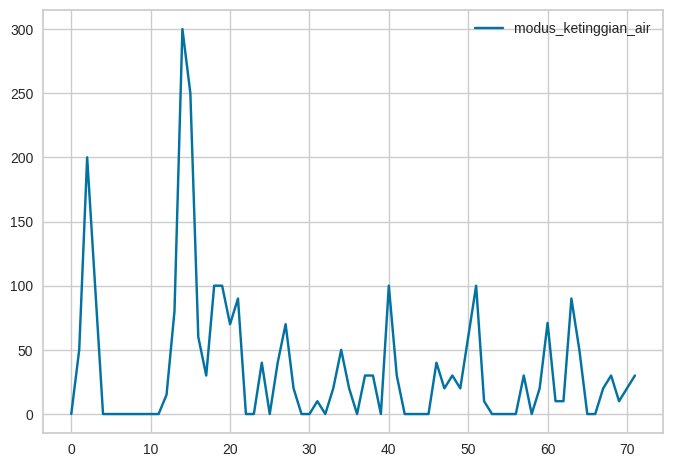

In [ ]:
# plot the dataset
data.plot()

In [ ]:
data.dtypes

date                    object
modus_ketinggian_air     int64
dtype: object

In [ ]:
# change type
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.dtypes

date                    datetime64[ns]
modus_ketinggian_air             int64
dtype: object

In [ ]:
#set index
data.set_index('date', drop=True, inplace=True)

In [ ]:
data.head()

,modus_ketinggian_air
date,
2015-01-01,0
2015-02-01,50
2015-03-01,200
2015-04-01,100
2015-05-01,0


<Axes: xlabel='date'>

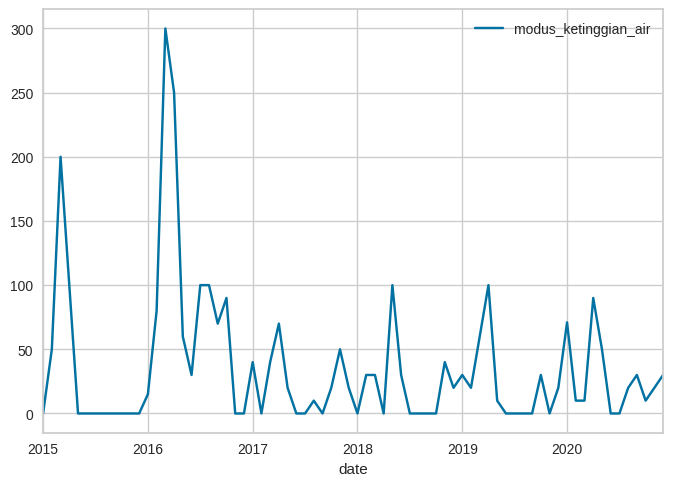

In [ ]:
data.plot()

In [ ]:
data.dtypes

modus_ketinggian_air    int64
dtype: object

In [ ]:
# Check for duplicate index values
duplicate_indices = data.index[data.index.duplicated()]
if len(duplicate_indices) > 0:
    print("Duplicate index values found!")
    print(duplicate_indices)
    # Handle duplicate values here (e.g., remove duplicates or choose appropriate action)
else:
    print("No duplicate index values found.")

No duplicate index values found.


In [ ]:
# Remove duplicate index values
data = data.loc[~data.index.duplicated(keep='first')]
print("Duplicate index values removed.")

Duplicate index values removed.


In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,modus_ketinggian_air
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(72, 1)"
5,Transformed data shape,"(72, 1)"
6,Transformed train set shape,"(69, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [ ]:
# init setup on exp
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,modus_ketinggian_air
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(72, 1)"
5,Transformed data shape,"(72, 1)"
6,Transformed train set shape,"(69, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,72.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,35.777778
3,Summary,Statistics,Transformed,Median,,20.0
4,Summary,Statistics,Transformed,Standard Deviation,,55.462517
5,Summary,Statistics,Transformed,Variance,,3076.090767
6,Summary,Statistics,Transformed,Kurtosis,,9.612064
7,Summary,Statistics,Transformed,Skewness,,2.81803
8,Summary,Statistics,Transformed,# Distinct Values,,16.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",43.522363


In [ ]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6551,0.5183,23.6970,29.7603,18700236099755332.0000,1.0184,-0.4272,0.2767
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6710,0.5551,24.2418,31.8574,15659757996985664.0000,0.9761,-0.4050,0.1767
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6714,0.4657,24.2162,26.7219,23770337363008460.0000,0.9557,0.0578,0.2333
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6780,0.5454,24.4868,31.2897,10511719422912970.0000,1.0697,-0.3137,0.2100
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5452,31.2934,10303997565035802.0000,1.0778,-0.3157,0.2233
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5459,31.2936,10301333820836516.0000,1.0779,-0.3157,0.2200
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5454,31.2935,10303296141086722.0000,1.0778,-0.3157,0.2267
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5459,31.2936,10301333820836512.0000,1.0779,-0.3157,0.5033
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5459,31.2936,10301353234952810.0000,1.0779,-0.3157,0.2300
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5452,31.2934,10303997565035802.0000,1.0778,-0.3157,0.1900


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6551,0.5183,23.6970,29.7603,18700236099755332.0000,1.0184,-0.4272,0.2767
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6710,0.5551,24.2418,31.8574,15659757996985664.0000,0.9761,-0.4050,0.2800
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6714,0.4657,24.2162,26.7219,23770337363008460.0000,0.9557,0.0578,0.2567
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6780,0.5454,24.4868,31.2897,10511719422912970.0000,1.0697,-0.3137,0.1267
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5452,31.2934,10303997565035802.0000,1.0778,-0.3157,0.1233
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5459,31.2936,10301333820836516.0000,1.0779,-0.3157,0.1233
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5454,31.2935,10303296141086722.0000,1.0778,-0.3157,0.1267
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5459,31.2936,10301333820836512.0000,1.0779,-0.3157,0.1267
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5459,31.2936,10301353234952810.0000,1.0779,-0.3157,0.1200
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6796,0.5454,24.5452,31.2934,10303997565035802.0000,1.0778,-0.3157,0.1267


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                   n_jobs=1)],
                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                    window_length=1)

# **Tuning**

In [ ]:
# train a dt model with default params
dt = create_model('et_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.7097,0.6340,25.5020,36.5830,0.7579,1.0094,-0.6185
1,2020-03,0.8470,0.6389,30.4916,36.5404,45556371875810248.0000,1.0036,0.0150
2,2020-06,0.4085,0.2821,15.0974,16.1574,10544336423455754.0000,1.0423,-0.6782
Mean,NaT,0.6551,0.5183,23.6970,29.7603,18700236099755332.0000,1.0184,-0.4272
SD,NaT,0.1831,0.1671,6.4129,9.6187,19471941852644904.0000,0.0171,0.3137


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.5764,0.5755,20.7097,33.2097,0.4265,0.5925,-0.3338
1,2020-03,1.1513,0.8483,41.4472,48.5116,21921078740354596.0000,1.4969,-0.7361
2,2020-06,0.2779,0.2010,10.2686,11.5116,21906383824076916.0000,0.9089,0.1481
Mean,NaT,0.6685,0.5416,24.1419,31.0776,14609154188143838.0000,0.9994,-0.3073
SD,NaT,0.3625,0.2653,12.9579,15.1802,10330233735815196.0000,0.3747,0.3615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.7s finished


In [ ]:
dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                   n_jobs=1)],
                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                    window_length=1)

In [ ]:
# define tuning grid
dt_grid = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.5815,0.5493,20.8947,31.6946,0.5261,0.6399,-0.2148
1,2020-03,1.1209,0.8190,40.3519,46.8392,27136561018136544.0000,1.4060,-0.6185
2,2020-06,0.2508,0.2033,9.2696,11.6466,25678184689730560.0000,0.8114,0.1280
Mean,NaT,0.6511,0.5239,23.5054,30.0601,17604915235955700.0000,0.9524,-0.2351
SD,NaT,0.3586,0.2520,12.8229,14.4137,12462784486293652.0000,0.3283,0.3051


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    5.3s finished


In [ ]:
# see tuned_dt params
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                   n_jobs=1)],
                    regressor=ExtraTreesRegressor(max_depth=4, n_jobs=-1, random_state=123),
                    window_length=1)

In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.5764,0.5755,20.7097,33.2097,0.4265,0.5925,-0.3338
1,2020-03,1.1513,0.8483,41.4472,48.5116,21921078740354596.0000,1.4969,-0.7361
2,2020-06,0.2779,0.2010,10.2686,11.5116,21906383824076916.0000,0.9089,0.1481
Mean,NaT,0.6685,0.5416,24.1419,31.0776,14609154188143838.0000,0.9994,-0.3073
SD,NaT,0.3625,0.2653,12.9579,15.1802,10330233735815196.0000,0.3747,0.3615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.8s finished


In [ ]:
# model object
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                   n_jobs=1)],
                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                    window_length=1)

In [ ]:
# tuner object
tuner

# **Plot Model**

In [ ]:
# plot forecast
plot_model(dt, plot = 'forecast')

In [ ]:
# plot forecast for 36 months in future
plot_model(dt, plot = 'forecast', data_kwargs = {'fh' : 63})

# **Predict**

In [ ]:
# predict on test set
holdout_pred = predict_model(dt)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ExtraTreesRegressor,0.5504,0.4078,19.6865,22.8650,0.8947,1.5291,-6.8422


In [ ]:
# show predictions df
holdout_pred.head()

,y_pred
2020-10,3.8660
2020-11,1.6075
2020-12,-4.5329


In [ ]:
# generate forecast for 60 period in future
predict_model(dt, fh = 63)

,y_pred
2020-10,3.8660
2020-11,1.6075
2020-12,-4.5329
2021-01,60.0627
2021-02,-15.7380
...,...
2025-08,9.9166
2025-09,-40.0834
2025-10,-40.0834
2025-11,-20.0834


# **save**

In [ ]:
# Generate forecasts for 63 periods in the future (including current data)
forecast_df = predict_model(dt, fh=63)

# Modify the forecasted values by replacing negative values with zero
forecast_df['y_pred'] = forecast_df['y_pred'].clip(lower=0)

# Extract the relevant columns for the forecast
#forecast_data = forecast_df[['date', 'modus_ketinggian_air', 'Label']]

# Save the modified forecast as CSV
#forecast_data.to_csv('forecast_results.csv', index=False

In [ ]:
forecast_df

,y_pred
2020-10,3.8660
2020-11,1.6075
2020-12,0.0000
2021-01,60.0627
2021-02,0.0000
...,...
2025-08,9.9166
2025-09,0.0000
2025-10,0.0000
2025-11,0.0000


In [ ]:
# Save the modified forecast as CSV
forecast_df.to_csv('Jakarta_Selatan.csv', index=False)